In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.generate import NetDreamer

In [2]:
IMAGE_PATH = '../../images/examples/'

### CNN Layer Visualization

In [3]:
original_model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/markus/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [01:34<00:00, 5.89MB/s] 


In [5]:
nd = NetDreamer(original_model)

In [6]:
recreated_img, processed_img = nd.generate_filter_visualization('features-conv-7', 5)

Iteration: 1, Loss: 1.4090
Iteration: 2, Loss: -2.1563
Iteration: 3, Loss: -9.0004
Iteration: 4, Loss: -16.2105
Iteration: 5, Loss: -23.0370
Iteration: 6, Loss: -29.4398
Iteration: 7, Loss: -35.5865
Iteration: 8, Loss: -41.3971
Iteration: 9, Loss: -47.0440
Iteration: 10, Loss: -52.5602
Iteration: 11, Loss: -57.8867
Iteration: 12, Loss: -63.1316
Iteration: 13, Loss: -68.3064
Iteration: 14, Loss: -73.4462
Iteration: 15, Loss: -78.5615
Iteration: 16, Loss: -83.6232
Iteration: 17, Loss: -88.6494
Iteration: 18, Loss: -93.6401
Iteration: 19, Loss: -98.6025
Iteration: 20, Loss: -103.5641
Iteration: 21, Loss: -108.5524
Iteration: 22, Loss: -113.5262
Iteration: 23, Loss: -118.5269
Iteration: 24, Loss: -123.5631
Iteration: 25, Loss: -128.6322
Iteration: 26, Loss: -133.7133
Iteration: 27, Loss: -138.8102
Iteration: 28, Loss: -143.9555
Iteration: 29, Loss: -149.1275
Iteration: 30, Loss: -154.3223


In [7]:
processed_img.shape

torch.Size([1, 3, 224, 224])

In [8]:
type(recreated_img)

numpy.ndarray

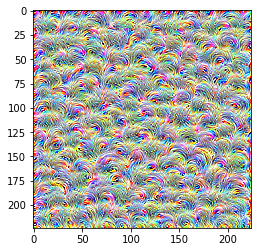

In [9]:
plt.imshow(recreated_img)

### Generate class example

In [17]:
target_class = 130  # Flamingo
pretrained_model = models.alexnet(pretrained=True)
nd = NetDreamer(pretrained_model)
rec_img, proc_img = nd.generate_class_sample(target_class)

Iteration: 1, Loss: -0.6993
Iteration: 2, Loss: -1.9824
Iteration: 3, Loss: -3.4815
Iteration: 4, Loss: -4.9594
Iteration: 5, Loss: -6.5181
Iteration: 6, Loss: -8.1024
Iteration: 7, Loss: -10.2373
Iteration: 8, Loss: -13.5355
Iteration: 9, Loss: -18.1901
Iteration: 10, Loss: -24.1257
Iteration: 11, Loss: -31.7749
Iteration: 12, Loss: -41.3585
Iteration: 13, Loss: -52.6118
Iteration: 14, Loss: -67.8730
Iteration: 15, Loss: -88.6516
Iteration: 16, Loss: -113.0451
Iteration: 17, Loss: -143.2974
Iteration: 18, Loss: -181.8113
Iteration: 19, Loss: -229.4460
Iteration: 20, Loss: -284.8223
Iteration: 21, Loss: -352.4193
Iteration: 22, Loss: -433.3660
Iteration: 23, Loss: -529.6004
Iteration: 24, Loss: -637.6765
Iteration: 25, Loss: -763.8470
Iteration: 26, Loss: -907.4882
Iteration: 27, Loss: -1073.6992
Iteration: 28, Loss: -1264.1138
Iteration: 29, Loss: -1475.0522
Iteration: 30, Loss: -1705.4279
Iteration: 31, Loss: -1954.9412
Iteration: 32, Loss: -2229.0417
Iteration: 33, Loss: -2529.6631


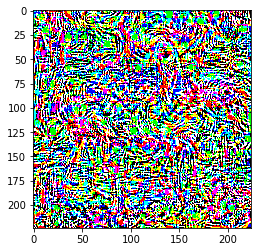

In [22]:
plt.imshow(rec_img)

### Deep Dream

In [23]:
pretrained_model = models.vgg19(pretrained=True).features
nd = NetDreamer(pretrained_model)

Iteration: 1, Loss: 1.4472
Iteration: 2, Loss: -0.5419
Iteration: 3, Loss: -2.3972
Iteration: 4, Loss: -4.4661
Iteration: 5, Loss: -7.3034
Iteration: 6, Loss: -9.3614
Iteration: 7, Loss: -12.5351
Iteration: 8, Loss: -16.2738
Iteration: 9, Loss: -19.2181
Iteration: 10, Loss: -22.0888
Iteration: 11, Loss: -26.8320
Iteration: 12, Loss: -32.0785
Iteration: 13, Loss: -38.4279
Iteration: 14, Loss: -43.4345
Iteration: 15, Loss: -49.9534
Iteration: 16, Loss: -55.1656
Iteration: 17, Loss: -59.6893
Iteration: 18, Loss: -65.3603
Iteration: 19, Loss: -72.3728
Iteration: 20, Loss: -79.6591


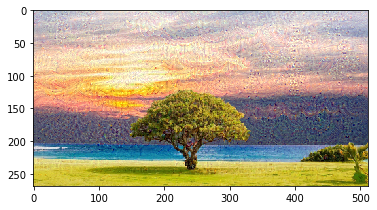

In [26]:
cnn_layer = 'conv-15'
filter_pos = 94

img = PIL.Image.open(IMAGE_PATH + 'dd_tree.jpg').convert('RGB')

# Fully connected layer is not needed
pretrained_model = models.vgg19(pretrained=True).features
nd = NetDreamer(pretrained_model)
dd, _ = nd.deep_dream(img, cnn_layer, filter_pos, 20)

plt.imshow(dd)

## Generate inverted image

Generate an Image that maximizes some Layers activations

In [27]:
original_img, name, target_class = get_example_data(0, img_path=IMAGE_PATH)

In [28]:
original_model = models.alexnet(pretrained=True)

In [29]:
nd = NetDreamer(original_model)

In [30]:
nd.original_model

FlatModel(
  (layers): ModuleDict(
    (features-conv-0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (features-relu-0): ReLU()
    (features-pool-0): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (features-conv-1): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (features-relu-1): ReLU()
    (features-pool-1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (features-conv-2): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-2): ReLU()
    (features-conv-3): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-3): ReLU()
    (features-conv-4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-4): ReLU()
    (features-pool-2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (avgpool-0): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifi

In [31]:
ii, _ = nd.generate_inverted_image(original_img, 224, 'features-conv-1')

Iteration: 0, Loss: 0.0944
Iteration: 5, Loss: 0.0752
Iteration: 10, Loss: 0.0543
Iteration: 15, Loss: 0.0346
Iteration: 20, Loss: 0.0231
Iteration: 25, Loss: 0.0189
Iteration: 30, Loss: 0.0167
Iteration: 35, Loss: 0.0140
Iteration: 40, Loss: 0.0117
Iteration: 45, Loss: 0.0112
Iteration: 50, Loss: 0.0110
Iteration: 55, Loss: 0.0108
Iteration: 60, Loss: 0.0107
Iteration: 65, Loss: 0.0105
Iteration: 70, Loss: 0.0104
Iteration: 75, Loss: 0.0103
Iteration: 80, Loss: 0.0102
Iteration: 85, Loss: 0.0101
Iteration: 90, Loss: 0.0101
Iteration: 95, Loss: 0.0101
Iteration: 100, Loss: 0.0101
Iteration: 105, Loss: 0.0101
Iteration: 110, Loss: 0.0101
Iteration: 115, Loss: 0.0101
Iteration: 120, Loss: 0.0101
Iteration: 125, Loss: 0.0101
Iteration: 130, Loss: 0.0101
Iteration: 135, Loss: 0.0101
Iteration: 140, Loss: 0.0101
Iteration: 145, Loss: 0.0100
Iteration: 150, Loss: 0.0100
Iteration: 155, Loss: 0.0100
Iteration: 160, Loss: 0.0100
Iteration: 165, Loss: 0.0100
Iteration: 170, Loss: 0.0100
Iterati

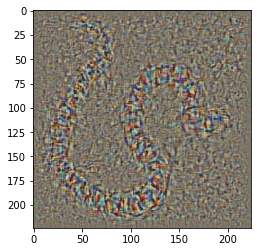

In [32]:
plt.imshow(ii)